<a href="https://colab.research.google.com/github/shruti05jain/CodeSpaze/blob/main/ModelTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-11-793456d92bc6>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
<ipython-input-11-793456d92bc6>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

Mean Absolute Error: 32277.511973131306
Mean Squared Error: 2386500250.3243804
Root Mean Squared Error: 48851.81931437539
R-squared: 0.352061319500817
Cross-Validation Scores: [-2.52717032e+09 -2.01285527e+09 -2.24773166e+09 -2.43729922e+09
 -1.87331130e+09]
Mean Cross-Validation Score: -2219673555.231536


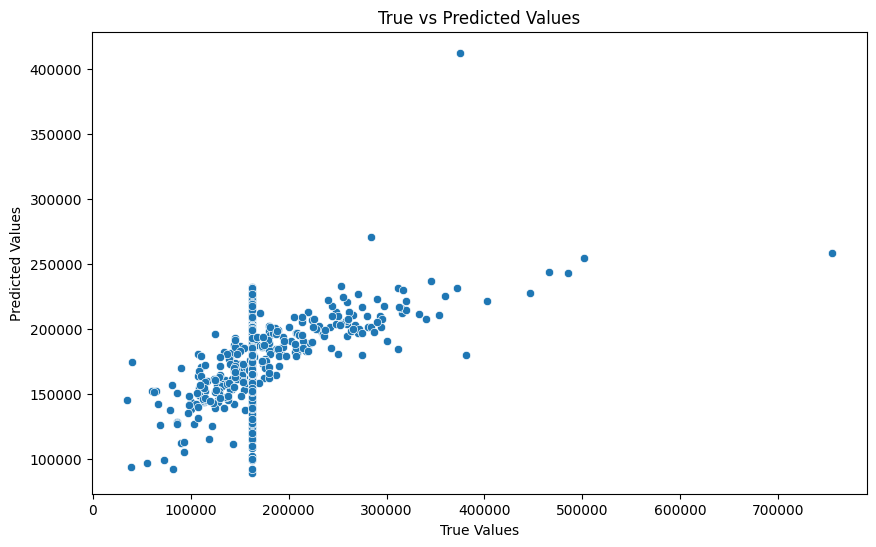

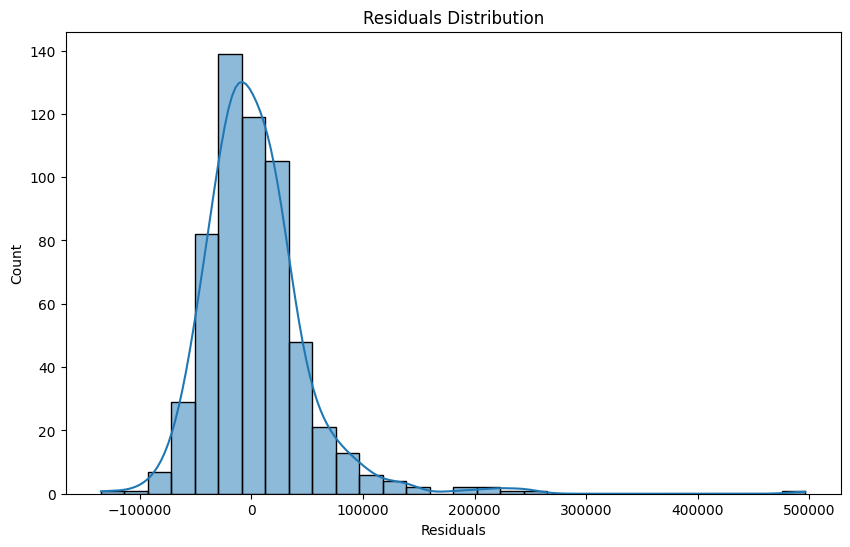

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load the dataset
data = pd.read_csv('/content/HousePricePrediction.xlsx - Sheet1.csv')  # Ensure correct file path

# Step 2: Preprocess the data
# Fill missing values for numerical columns with the median
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Fill missing categorical values with the mode (most frequent value)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Now the data is preprocessed and missing values are handled.
# Handle missing values
# Handle missing values for numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns  # Get numerical columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())  # Fill missing values with the median for numerical columns

# Handle missing values for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns  # Get categorical columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)  # Fill missing values with the mode (most frequent value) for categorical columns

# Now the missing values in both numerical and categorical columns are handled

# Step 2.1: Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Check if 'SalePrice' is present in the columns
if 'SalePrice' not in data_encoded.columns:
    raise ValueError("The 'SalePrice' column is missing from the dataset")

# Step 3: Split the data into features (X) and target (y)
X = data_encoded.drop('SalePrice', axis=1)  # Drop the target column
y = data_encoded['SalePrice']  # Target variable

# Step 4: Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Initialize the Linear Regression model
model = LinearRegression()

# Step 7: Train the model
model.fit(X_train_scaled, y_train)

# Step 8: Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Step 9: Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Step 10: Cross-validation to improve reliability
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Step 11: Visualize the true vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title("True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

# Step 12: Visualize the residuals (errors)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()
